In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import os

### Load the dataset

In [8]:
data_dir = 'C:/Users/udayk/OneDrive - stevens.edu/Documents/GitHub/EU-Core-Temporal-Network-Analysis/data'
os.chdir(data_dir)
filename='email-Eu-core-temporal.txt'

In [9]:
data = pd.read_csv(filename, sep=' ', header=None, names=['u', 'v', 't'])

In [10]:
# Convert timestamps to datetime objects
data['datetime'] = data['t'].apply(lambda x: timedelta(seconds=x))
data = data.drop(columns=['t'])

In [11]:
G = nx.from_pandas_edgelist(data, source='u', target='v', edge_attr='datetime', create_using=nx.DiGraph())

In [12]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
avg_degree = 2 * num_edges / num_nodes
density = nx.density(G)

print(f'Number of nodes: {num_nodes}')
print(f'Number of edges: {num_edges}')
print(f'Average degree: {avg_degree:.2f}')
print(f'Network density: {density:.4f}')

Number of nodes: 986
Number of edges: 24929
Average degree: 50.57
Network density: 0.0257


In [13]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

In [14]:
# Note: Converting to undirected graph to calculate clustering coefficient, diameter, and average path length
G_undirected = G.to_undirected()

avg_clustering_coefficient = nx.average_clustering(G_undirected)
diameter = nx.diameter(G_undirected)
avg_path_length = nx.average_shortest_path_length(G_undirected)

print(f'Average clustering coefficient: {avg_clustering_coefficient:.4f}')
print(f'Diameter: {diameter}')
print(f'Average path length: {avg_path_length:.2f}')

Average clustering coefficient: 0.4071
Diameter: 7
Average path length: 2.59


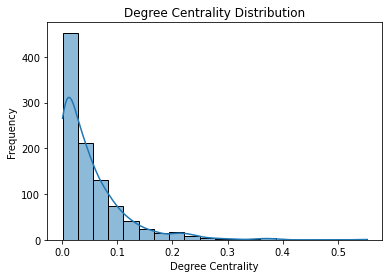

In [15]:
degree_values = list(degree_centrality.values())
sns.histplot(degree_values, kde=True, bins=20)
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Degree Centrality Distribution')
plt.savefig('viz-1.png', dpi=300, bbox_inches='tight')
plt.show()

In [16]:
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, node_size=50, with_labels=False, alpha=0.5, edge_color='grey')
plt.title('Email Network Visualization')
plt.savefig('viz-1.png', dpi=300, bbox_inches='tight')
plt.show()

KeyboardInterrupt: 

In [ ]:
dept_counts = data.groupby('u').apply(lambda x: x['v'].nunique()).reset_index()
dept_counts.columns = ['Node ID', 'Department Size']

plt.figure(figsize=(8, 6))
sns.barplot(x='Node ID', y='Department Size', data=dept_counts)
plt.xlabel('Department ID')
plt.ylabel('Number of Individuals')
plt.title('Analysis of Individual Team Communication')
plt.savefig('viz-3.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
dept_counts = data.groupby('u_dept').apply(lambda x: x['v'].nunique()).reset_index()
dept_counts.columns = ['Department ID', 'Department Size']

plt.figure(figsize=(8, 6))
sns.barplot(x='Department ID', y='Department Size', data=dept_counts)
plt.xlabel('Department ID')
plt.ylabel('Number of Individuals')
plt.title("Number of Individuals in Each Department (ONLY 4)")
plt.savefig('viz-32.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# Resample data by day and count the number of emails sent each day
daily_email_counts = data.groupby(pd.Grouper(key='datetime', freq='D'))['datetime'].count()

# Reshape data to pivot table format for heatmap
daily_email_counts = pd.DataFrame(daily_email_counts).reset_index()
daily_email_counts.columns = ['Date', 'Email Count']
daily_email_counts['Day of Week'] = daily_email_counts['Date'].dt.dayofweek
daily_email_counts['Weekend'] = daily_email_counts['Day of Week'].isin([5, 6])

# Create heatmap of email counts by date and day of week
plt.figure(figsize=(12, 6))
email_counts_by_day = pd.pivot_table(daily_email_counts, values='Email Count', index='Weekend', columns='Day of Week')
sns.heatmap(email_counts_by_day, cmap='Blues', annot=True, fmt='g', cbar=False)
plt.xlabel('Day of Week')
plt.ylabel('')
plt.title('Email Counts by Date and Day of Week')
plt.savefig('viz-4.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
degree_centrality = nx.degree_centrality(G)

degree_df = pd.DataFrame(list(degree_centrality.items()), columns=['Node ID', 'Degree Centrality'])

plt.figure(figsize=(8, 6))
sns.scatterplot(data=degree_df, x='Node ID', y='Degree Centrality')
plt.xlabel('Node ID')
plt.ylabel('Degree Centrality')
plt.title('Node Degree Centrality Scatter Plot')
plt.savefig('viz-5.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
degree_centrality = nx.degree_centrality(G)

node_sizes = [degree_centrality[node] * 500 for node in G.nodes()]
node_colors = [degree_centrality[node] for node in G.nodes()]

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=42)

# Use scatter plot instead of nx.draw
plt.scatter(*zip(*pos.values()), s=node_sizes, c=node_colors, cmap='Reds', alpha=0.5)

plt.colorbar(label='Degree Centrality')
plt.title('Node Size and Color-coded by Degree Centrality')
plt.savefig('viz-6.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
data = pd.read_csv(filename, sep=' ', header=None, names=['u', 'v', 't'])

# Convert timestamps to datetime objects
data['datetime'] = data['t'].apply(lambda x: timedelta(seconds=x))
data = data.drop(columns=['t'])

# Create department column based on node IDs
dept1_nodes = range(1, 310)
dept2_nodes = range(310, 473)
dept3_nodes = range(473, 562)
dept4_nodes = range(562, 704)

data.loc[data['u'].isin(dept1_nodes), 'u_dept'] = 'Dept1'
data.loc[data['u'].isin(dept2_nodes), 'u_dept'] = 'Dept2'
data.loc[data['u'].isin(dept3_nodes), 'u_dept'] = 'Dept3'
data.loc[data['u'].isin(dept4_nodes), 'u_dept'] = 'Dept4'

In [ ]:
plt.figure(figsize=(10, 6))
dept_counts = data['u_dept'].value_counts()
dept_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.xticks(rotation=0)
plt.xlabel('Department')
plt.ylabel('Email Frequency')
plt.title('Departmental Email Frequency')
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
time_counts = data.groupby('datetime').size().reset_index(name='count')
plt.plot(time_counts['datetime'], time_counts['count'])
plt.xlabel('Time')
plt.ylabel('Email Frequency')
plt.title('Email Frequency by Time')
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
time_counts = data.groupby('datetime').size().reset_index(name='count')
time_counts['day'] = time_counts['datetime'].dt.day
time_counts = time_counts.groupby('day')['count'].sum().reset_index(name='count')
plt.plot(time_counts['day'], time_counts['count'])
plt.xlabel('Day')
plt.ylabel('Email Frequency')
plt.title('Email Frequency by Time')
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
time_counts = data.groupby('datetime').size().reset_index(name='count')
time_counts['day'] = time_counts['datetime'].apply(lambda x: x.total_seconds()//(24*3600))
time_counts = time_counts.groupby('day')['count'].sum().reset_index(name='count')
plt.plot(time_counts['day'], time_counts['count'])
plt.xlabel('Day')
plt.ylabel('Email Frequency')
plt.title('Email Frequency by Time')
plt.savefig('viz-8.png', dpi=300, bbox_inches='tight')
plt.show()
